# Telco Customer Churn Prediction 

## Necessary imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, 
                             precision_score, recall_score, f1_score, 
                             confusion_matrix)
import shap
import joblib

D:\anaconda_new\envs\mindDigit\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Data Loading & Initial Exploration

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop('customerID', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
# Convert 'TotalCharges' to float, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Impute missing values with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\disha\AppData\Local\Temp\ipykernel_17648\1239182893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [10]:
# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

##### Distribution of target column:

Churn
No     5164
Yes    1857
Name: count, dtype: int64


C:\Users\disha\AppData\Local\Temp\ipykernel_17648\540133042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.countplot(x='Churn', data=df, palette='crest')


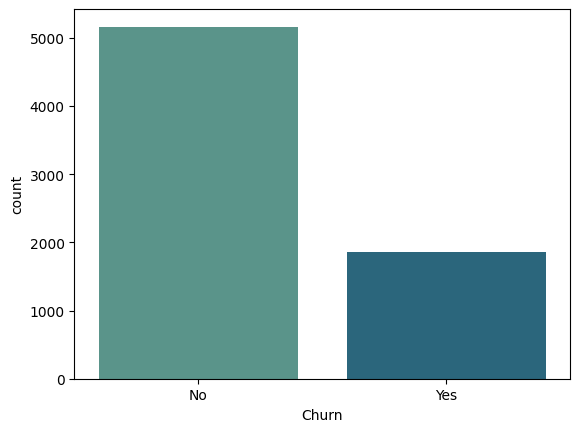

In [11]:
print(df['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=df, palette='crest')

##### The distribution of the binary classes shows a slight data imbalance that needs attention

##### Categorical features count plot

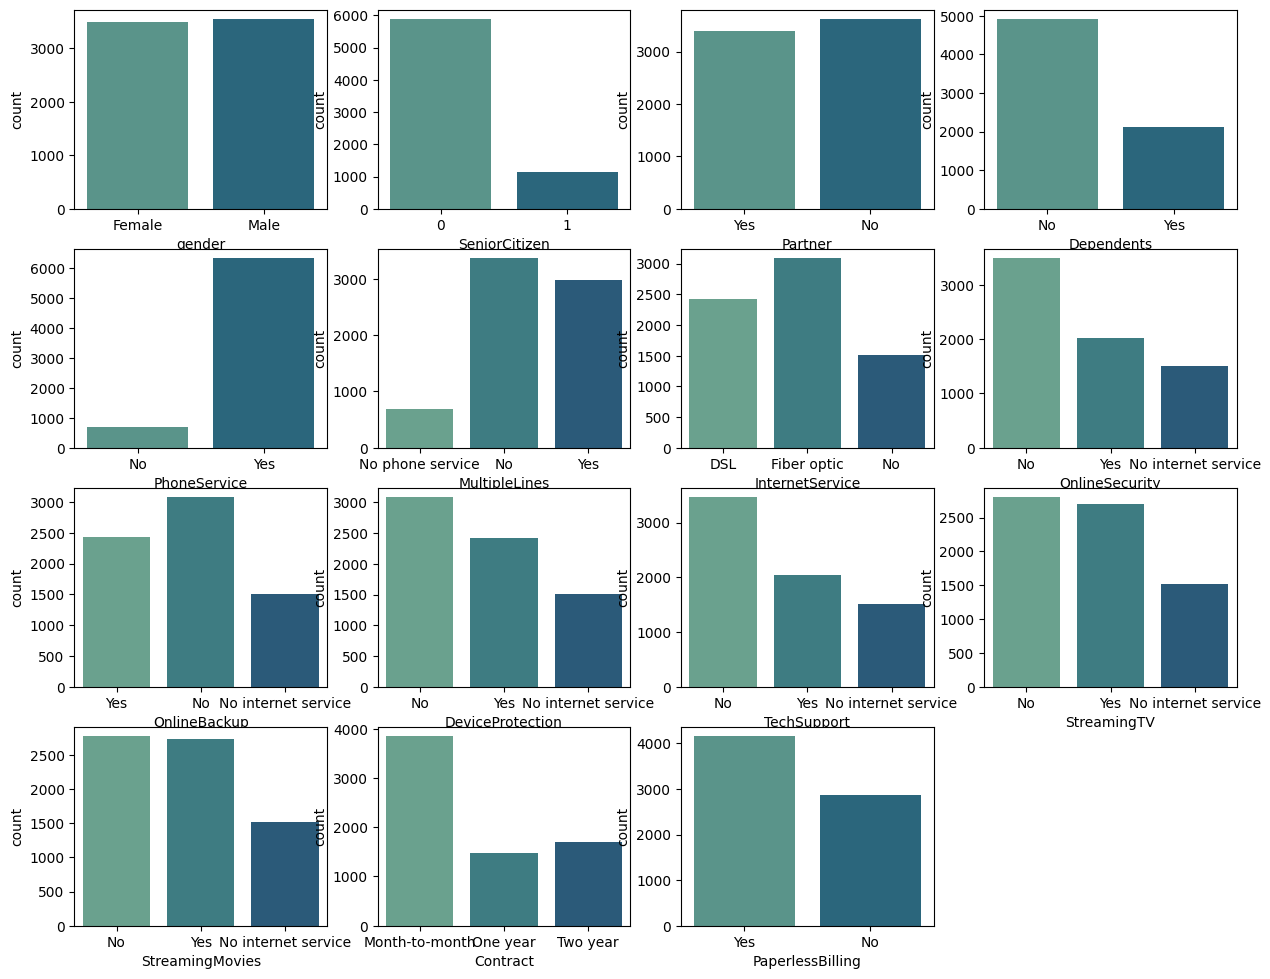

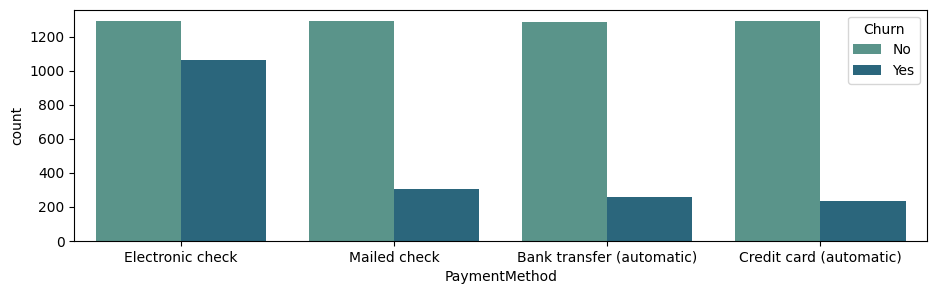

<Figure size 640x480 with 0 Axes>

In [12]:
import warnings
warnings.filterwarnings('ignore')
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show() 
plt.tight_layout()

- The gender count plot shows an equally distribution of males and females in the dataset
- Some features have 'No' and 'No Internet Service' or 'No Phone Service' as a separate category which don't give new info and could all be considered as 'No' label

## EDA Interpretation: Categorical Features and Churn Distribution

### General Observations

* Many binary and categorical features show **visible differences in churn behavior**, making them strong candidates for modeling.
* Most services have a **"No internet service"** option, which reduces their effective churn impact unless recoded.

---

### Feature-Wise Insights

#### **1. Gender**

* Churn distribution appears almost equal for males and females → **gender is not a strong churn predictor**.

#### **2. SeniorCitizen**

* Senior citizens (label `1`) have a slightly **higher churn rate** → age might influence churn behavior.

#### **3. Partner / Dependents**

* Customers **without partners** or **without dependents** churn more often → suggests family-tied users are more stable.

#### **4. PhoneService / MultipleLines**

* Very slight differences in churn, especially for those with no phone service. These features might be **weak predictors**.

#### **5. InternetService**

* **Fiber optic users churn the most**, compared to DSL or no service → possibly due to cost or performance expectations.

#### **6. OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport**

* For all these services, **not subscribing increases churn** significantly.
* Suggests customers who opt out of value-added services are more likely to leave.

#### **7. StreamingTV / StreamingMovies**

* Customers with streaming services are slightly more likely to churn, but difference is less drastic than with security or backup services.

#### **8. Contract**

* **Month-to-month customers churn the most**, followed by one-year, then two-year → clearly shows long-term contracts reduce churn.

#### **9. PaperlessBilling**

* Users with paperless billing have higher churn → might correlate with tech-savvy, mobile, or less loyal customer behavior.

#### **10. PaymentMethod**

* **Electronic check users churn the most**.
* Customers using automatic payments (bank transfer or credit card) are more stable → these methods can be churn-preventive.

---

### Takeaways

* Strong churn predictors: `Contract`, `PaymentMethod`, `OnlineSecurity`, `TechSupport`, `InternetService`, `SeniorCitizen`
* Weak or neutral predictors: `Gender`, `PhoneService`, `MultipleLines`

---

##### Histogram & Boxplots of continous features

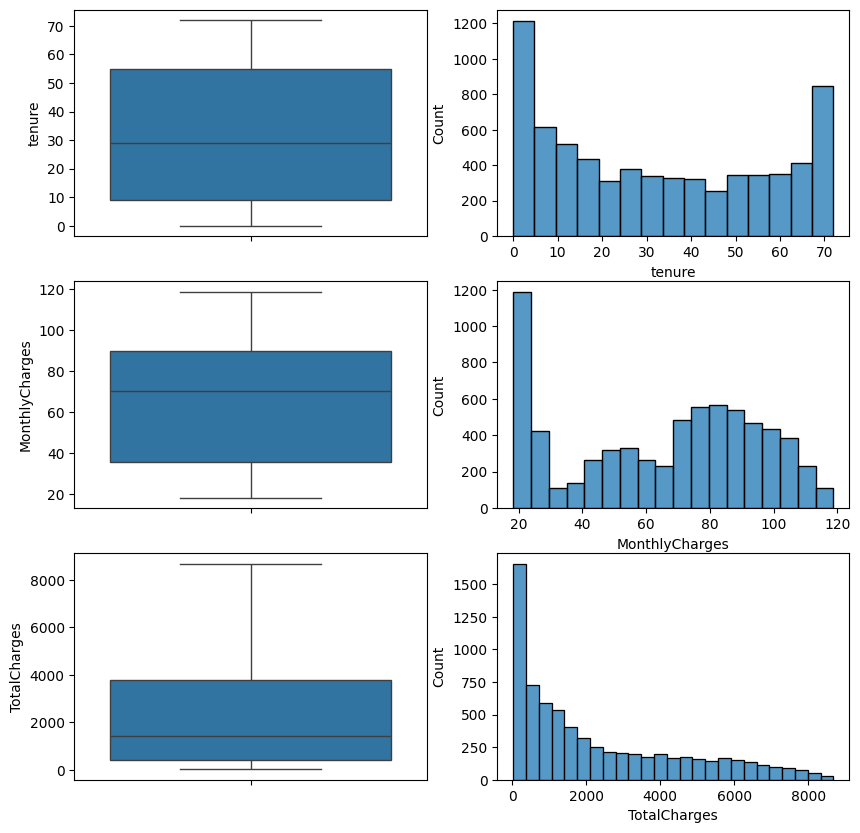

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
_ = sns.boxplot(y= df['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=df)

plt.subplot(3, 2, 3)
_ = sns.boxplot(y= df['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=df)

plt.subplot(3, 2, 5)
_ = sns.boxplot(y= df['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=df)

- Boxplots show that there are No outliers in the continuous variables
- Histograms show right skewness in the 'TotalCharges' feature

##### Scatter plot of Monthly Charges versus Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

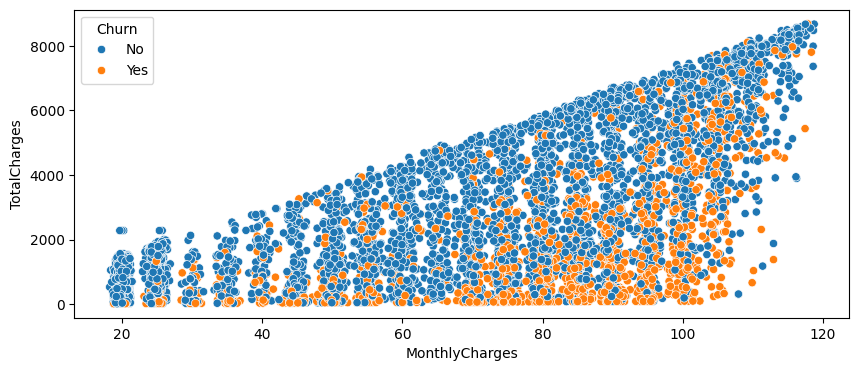

In [14]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

- This implies a positive correlation between the monthly charges, and total charges.
- The churn rate increases with the increase in monthly charges.

### Label Encoding (Binary columns)

In [15]:
label_encode_cols = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling', 'Churn'
]

le = LabelEncoder()
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])

###  One-Hot Encoding (Multiclass categorical columns)

In [16]:
one_hot_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df = pd.get_dummies(df, columns=one_hot_cols)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7021 non-null   int32  
 1   SeniorCitizen                            7021 non-null   int64  
 2   Partner                                  7021 non-null   int32  
 3   Dependents                               7021 non-null   int32  
 4   tenure                                   7021 non-null   int64  
 5   PhoneService                             7021 non-null   int32  
 6   PaperlessBilling                         7021 non-null   int32  
 7   MonthlyCharges                           7021 non-null   float64
 8   TotalCharges                             7021 non-null   float64
 9   Churn                                    7021 non-null   int32  
 10  MultipleLines_No                         7021 non-nul

##### Correlation Heatmap

<Axes: >

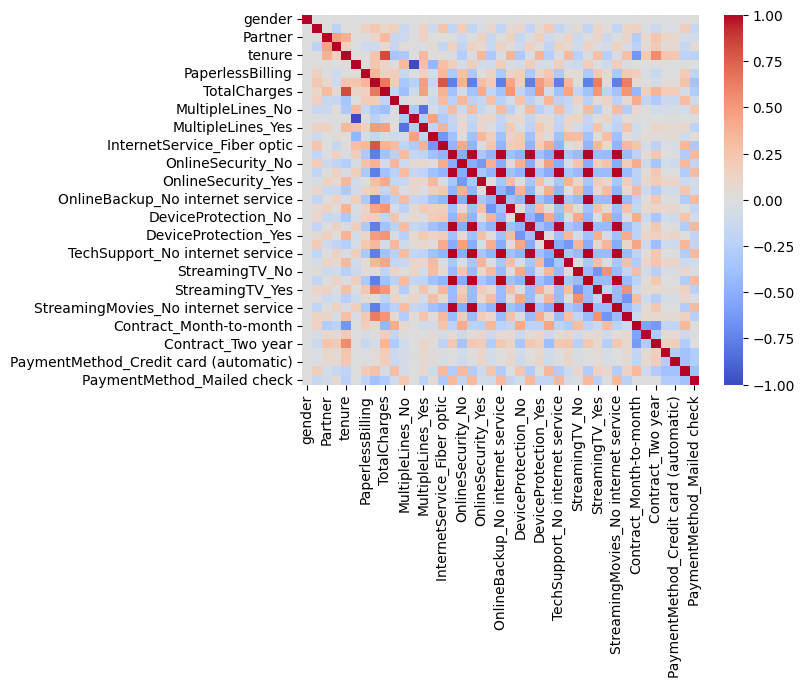

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')

#### Correlation Heatmap Summary

This heatmap displays Pearson correlation values between numerical and one-hot encoded features in the Telco Customer Churn dataset.

**Observations:**

1. **Low Redundancy**
   Most features have weak to moderate correlations, indicating low multicollinearity.

2. **Positive Correlations**

   * `tenure` and `TotalCharges` are positively correlated, which is expected.
   * `Contract_Two year` also shows moderate correlation with `TotalCharges`.

3. **Negative Correlations**

   * Strong negative correlations appear between mutually exclusive one-hot features (e.g., `Contract_Month-to-month` vs. `Contract_Two year`).
   * Similar patterns observed with `OnlineSecurity_Yes` vs. `OnlineSecurity_No`, etc.

4. **No Immediate Multicollinearity Issues**
   There are no features with near-perfect correlation that would require removal.

The dataset is well-structured for machine learning. No critical multicollinearity exists, and relationships between key features follow logical patterns.


## Feature Scaling and Engineering

In [19]:
condition = [
    ((df.tenure >= 0) & (df.tenure <= 12)),
    ((df.tenure > 12) & (df.tenure <= 24)),
    ((df.tenure > 24) & (df.tenure <= 36)),
    ((df.tenure > 36) & (df.tenure <= 48)),
    ((df.tenure > 48) & (df.tenure <= 60)),
    (df.tenure > 60)
]
choice = [0, 1, 2, 3, 4, 5]

df['tenure_range'] = np.select(condition, choice)


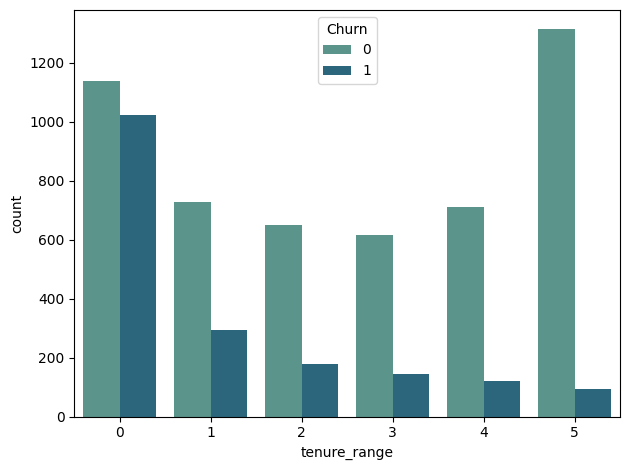

In [20]:
_ = sns.countplot(x= 'tenure_range', hue='Churn', data=df, palette='crest', order=choice)
plt.tight_layout()

In [21]:
df = pd.get_dummies(df, columns=['tenure_range'], prefix='tenure_group')

We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.

In [22]:
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])
df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])
print("Skewness before log:", df['TotalCharges'].skew())
print("Skewness after log:", df['TotalCharges_log'].skew())
print("Skewness before log:", df['MonthlyCharges'].skew())
print("Skewness after log:", df['MonthlyCharges_log'].skew())

Skewness before log: 0.9590879533385414
Skewness after log: -0.7448346006404822
Skewness before log: -0.22409728909692606
Skewness after log: -0.7239844475954358


#### Scale numerical features (StandardScaler)

In [23]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7021 non-null   int32  
 1   SeniorCitizen                            7021 non-null   int64  
 2   Partner                                  7021 non-null   int32  
 3   Dependents                               7021 non-null   int32  
 4   tenure                                   7021 non-null   float64
 5   PhoneService                             7021 non-null   int32  
 6   PaperlessBilling                         7021 non-null   int32  
 7   MonthlyCharges                           7021 non-null   float64
 8   TotalCharges                             7021 non-null   float64
 9   Churn                                    7021 non-null   int32  
 10  MultipleLines_No                         7021 non-nul

#### Handle Class Imbalance

In [25]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)

### Feature Importance

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)
importances = pd.Series(rf.feature_importances_, index=X_res.columns)
top_features = importances.sort_values(ascending=False).head(20).index.tolist()
X_res = X_res[top_features]

In [27]:
print(top_features)

['TotalCharges_log', 'tenure', 'TotalCharges', 'MonthlyCharges', 'MonthlyCharges_log', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'PaymentMethod_Electronic check', 'Contract_Two year', 'InternetService_Fiber optic', 'gender', 'OnlineBackup_No', 'Partner', 'DeviceProtection_No', 'tenure_group_0', 'Dependents', 'PaperlessBilling', 'Contract_One year', 'PaymentMethod_Bank transfer (automatic)']


In [28]:
top_features = [
    'tenure', 'TotalCharges', 'MonthlyCharges',
    'Contract_Month-to-month', 'OnlineSecurity_No',
    'TechSupport_No', 'PaymentMethod_Electronic check',
    'Contract_Two year', 'InternetService_Fiber optic', 'gender',
    'OnlineBackup_No', 'Partner', 'DeviceProtection_No',
    'tenure_group_0', 'Dependents', 'PaperlessBilling',
    'Contract_One year', 'PaymentMethod_Bank transfer (automatic)'
]
X_res = X_res[top_features]


## Model Training and Evaluation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [31]:
# Logistic Regression
from sklearn.metrics import classification_report
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1548
           1       0.78      0.83      0.80      1551

    accuracy                           0.80      3099
   macro avg       0.80      0.80      0.80      3099
weighted avg       0.80      0.80      0.80      3099



In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'C': 10}


In [33]:
clf = LogisticRegression(solver='liblinear',max_iter=1000,C=10)
clf.fit(X_train, y_train)

print("Accuracy on test set: {}".format(clf.score(X_test, y_test)))
print("Accuracy on train set: {}".format(clf.score(X_train, y_train)))
LRTrain = clf.score(X_train, y_train)
LRTest  = clf.score(X_test, y_test)

Accuracy on test set: 0.797676669893514
Accuracy on train set: 0.7976206944252318


In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

DTTrain = tree.score(X_train, y_train)
DTTest  = tree.score(X_test, y_test)

Accuracy on training set: 0.999
Accuracy on test set: 0.779


In [35]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_logreg = AdaBoostClassifier(estimator=clf, n_estimators=10, random_state=42)
adaboost_logreg.fit(X_train, y_train)

adaboost_decTree = AdaBoostClassifier(estimator=tree, n_estimators=10, random_state=42)
adaboost_decTree.fit(X_train, y_train)

# Evaluate
adaboost = [adaboost_logreg.score(X_test, y_test), adaboost_decTree.score(X_test, y_test), 0.0000]

print("After Adaboosting Logistic Regression Accuracy :{} → {}"
      .format(LRTest, adaboost_logreg.score(X_test, y_test)))

print("After Adaboosting Decision Tree Accuracy :{} → {}"
      .format(DTTest, adaboost_decTree.score(X_test, y_test)))


After Adaboosting Logistic Regression Accuracy :0.797676669893514 → 0.7747660535656663
After Adaboosting Decision Tree Accuracy :0.7792836398838335 → 0.792513714101323


In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier

# Bagging (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Boosting (AdaBoost)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

# Stacking
estimators = [('lr', LogisticRegression()), ('rf', RandomForestClassifier())]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)


StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

models = {
    'Random Forest': rf,
    'AdaBoost': ada,
    'Stacking': stack
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Results:")
    print(f"Accuracy     : {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC      : {roc_auc_score(y_test, y_proba):.4f}")
    print(f"F1 Score     : {f1_score(y_test, y_pred):.4f}")
    print(f"Precision    : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall       : {recall_score(y_test, y_pred):.4f}")



Random Forest Results:
Accuracy     : 0.8525
ROC AUC      : 0.9171
F1 Score     : 0.8552
Precision    : 0.8410
Recall       : 0.8698

AdaBoost Results:
Accuracy     : 0.7977
ROC AUC      : 0.8763
F1 Score     : 0.8058
Precision    : 0.7753
Recall       : 0.8388

Stacking Results:
Accuracy     : 0.8474
ROC AUC      : 0.9141
F1 Score     : 0.8501
Precision    : 0.8360
Recall       : 0.8646


In [38]:
for name, model in models.items():
    print(f"{name} - Train Accuracy: {model.score(X_train, y_train):.4f}, Test Accuracy: {model.score(X_test, y_test):.4f}")

Random Forest - Train Accuracy: 0.9988, Test Accuracy: 0.8525
AdaBoost - Train Accuracy: 0.8050, Test Accuracy: 0.7977
Stacking - Train Accuracy: 0.9953, Test Accuracy: 0.8474


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

base_estimators = [
    ('lr', LogisticRegression(C=1.0, solver='liblinear', max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=7,verbose=-1, random_state=42)),
    ('svm', SVC(C=1.5, kernel='rbf', probability=True, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=300, random_state=42))
]


In [40]:
from xgboost import XGBClassifier
# Use a shallow XGBoost as meta-learner
final_estimator = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')


In [41]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    passthrough=True,  # allows meta-model to also use original inputs
    stack_method='predict_proba'
)

stack.fit(X_train, y_train)


StackingClassifier(estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_cate...
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None, ...),
                   passthrough=True, stack_method='predict_proba')

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

y_pred = stack.predict(X_test)
y_proba = stack.predict_proba(X_test)[:, 1]

print("Tuned Stacking Model Performance:")
print(f"Accuracy     : {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC      : {roc_auc_score(y_test, y_proba):.4f}")
print(f"F1 Score     : {f1_score(y_test, y_pred):.4f}")
print(f"Precision    : {precision_score(y_test, y_pred):.4f}")
print(f"Recall       : {recall_score(y_test, y_pred):.4f}")


Tuned Stacking Model Performance:
Accuracy     : 0.8422
ROC AUC      : 0.9160
F1 Score     : 0.8481
Precision    : 0.8183
Recall       : 0.8801


In [43]:
import joblib
joblib.dump(stack, "telco_churn_stacked_model.pkl")
joblib.dump(scaler, "telco_scaler.pkl")

['telco_scaler.pkl']

In [44]:
with open("telco_feature_columns.txt", "w") as f:
    for col in X_train.columns:
        f.write(f"{col}\n")